## Stack Overflow Annual Developer Survey 2020

* With nearly 65,000 responses fielded from over 180 countries and dependent territories, our 2020 Annual Developer Survey examines all aspects of the developer experience from career satisfaction and job search to education and opinions on open source software.

### Importing packages required for the analysis

In [120]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

In [121]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### Creating a dataframe and reading in the CSV File

In [7]:
df = pd.read_csv('survey_results_2020.csv')

### Displaying the file shape (Rows and columns)

In [8]:
df.shape

(64462, 61)

###  Information about the DataFrame including the index dtype and columns, non-null values.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64462 entries, 0 to 64461
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64462 non-null  int64  
 1   MainBranch                    64163 non-null  object 
 2   Hobbyist                      64417 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57901 non-null  object 
 5   CompFreq                      40070 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64073 non-null  object 
 9   CurrencyDesc                  45473 non-null  object 
 10  CurrencySymbol                45473 non-null  object 
 11  DatabaseDesireNextYear        44071 non-null  object 
 12  DatabaseWorkedWith            49538 non-null  object 
 13  D

In [10]:
###Displaying first five rows of the dataframe

In [11]:
df.head(5)

Respondent                                         MainBranch Hobbyist  \
0           1                     I am a developer by profession      Yes   
1           2                     I am a developer by profession       No   
2           3                        I code primarily as a hobby      Yes   
3           4                     I am a developer by profession      Yes   
4           5  I used to be a developer by profession, but no...      Yes   

    Age Age1stCode CompFreq  CompTotal  ConvertedComp             Country  \
0   NaN         13  Monthly        NaN            NaN             Germany   
1   NaN         19      NaN        NaN            NaN      United Kingdom   
2   NaN         15      NaN        NaN            NaN  Russian Federation   
3  25.0         18      NaN        NaN            NaN             Albania   
4  31.0         16      NaN        NaN            NaN       United States   

     CurrencyDesc CurrencySymbol DatabaseDesireNextYear  \
0   European Euro            EUR   Microsoft SQL Server   
1  Pound sterling            GBP                    NaN   
2             NaN            NaN                    NaN   
3    Albanian lek            ALL                    NaN   
4             NaN            NaN       MySQL;PostgreSQL   

                          DatabaseWorkedWith  \
0  Elasticsearch;Microsoft SQL Server;Oracle   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4              MySQL;PostgreSQL;Redis;SQLite   

                                             DevType  \
0  Developer, desktop or enterprise applications;...   
1            Developer, full-stack;Developer, mobile   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                           EdLevel  \
0  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2                                              NaN   
3  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
4     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                          Employment  \
0  Independent contractor, freelancer, or self-em...   
1                                 Employed full-time   
2                                                NaN   
3                                                NaN   
4                                 Employed full-time   

                      Ethnicity Gender  \
0  White or of European descent    Man   
1                           NaN    NaN   
2                           NaN    NaN   
3  White or of European descent    Man   
4  White or of European descent    Man   

                                          JobFactors                 JobSat  \
0  Languages, frameworks, and other technologies ...     Slightly satisfied   
1                                                NaN      Very dissatisfied   
2                                                NaN                    NaN   
3  Flex time or a flexible schedule;Office enviro...  Slightly dissatisfied   
4                                                NaN                    NaN   

                                             JobSeek  \
0       I am not interested in new job opportunities   
1       I am not interested in new job opportunities   
2                                                NaN   
3  I’m not actively looking, but I am open to new...   
4                                                NaN   

     LanguageDesireNextYear        LanguageWorkedWith  \
0    C#;HTML/CSS;JavaScript    C#;HTML/CSS;JavaScript   
1              Python;Swift          JavaScript;Swift   
2  Objective-C;Python;Swift  Objective-C;Python;Swift   
3                       NaN                       NaN   
4           Java;Ruby;Scala         HTML/CSS;Ruby;SQL   

             MiscTechDesir

### Checking any rows for duplicate data

In [12]:
df2=len(df)-len(df.drop_duplicates())
df2

1

### Removing dupelicate data and creating new dataframe

In [13]:
df2=df.drop_duplicates()

In [14]:
len(df2)-len(df.drop_duplicates())

0

### Count total in each column for missing data

In [15]:
df2.isna().sum()

Respondent                          0
MainBranch                        299
Hobbyist                           45
Age                             19015
Age1stCode                       6561
CompFreq                        24392
CompTotal                       29635
ConvertedComp                   29705
Country                           389
CurrencyDesc                    18989
CurrencySymbol                  18989
DatabaseDesireNextYear          20391
DatabaseWorkedWith              14924
DevType                         15091
EdLevel                          7030
Employment                        607
Ethnicity                       18513
Gender                          13904
JobFactors                      15112
JobSat                          19267
JobSeek                         12734
LanguageDesireNextYear          10348
LanguageWorkedWith               7083
MiscTechDesireNextYear          22082
MiscTechWorkedWith              24147
NEWCollabToolsDesireNextYear    17174
NEWCollabToo

### Commeting out some code

In [16]:
#fig=df2['Country'].value_counts()[:10].plot(kind='barh')
#fig.set_title('TOP 10- Geographic Location of Respondents')
#fig.set_xlabel('Count (k)')
#fig.set_ylabel('Country')

### Where are the Top 20 Respondent's from?

* Geographic location and Count of Respondent's

In [17]:
groupCountry= df.groupby( ["Country"] ).count().reset_index()
groupCountrySort=groupCountry[['Country','Respondent' ]]
srtGroupContry=groupCountrySort.sort_values(by='Respondent', ascending=False)
plt_bardf=srtGroupContry[:20]

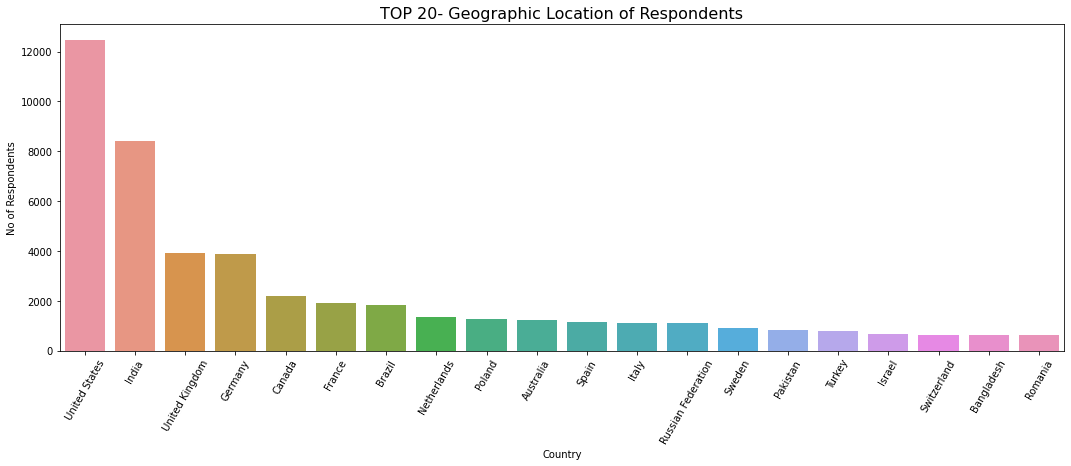

In [18]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=60)
sns.barplot(x='Country', y='Respondent',data=plt_bardf)
plt.ylabel('No of Respondents')
plt.xlabel('Country')
plt.title('TOP 20- Geographic Location of Respondents', fontsize=16)
plt.show()

### What is there employment status ?

Text(0, 0.5, 'Count (k)')

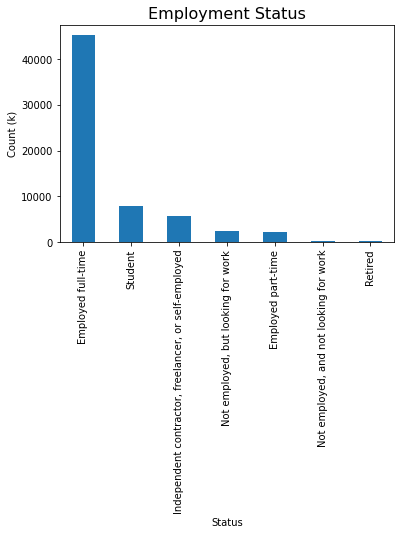

In [19]:
fig3=df2['Employment'].value_counts().plot(kind='bar')
fig3.set_title('Employment Status',fontsize=16)
fig3.set_xlabel('Status')
fig3.set_ylabel('Count (k)')

### Cardinality 

In [20]:
df2.apply(lambda x: [x.nunique()])

Respondent  MainBranch  Hobbyist  Age  Age1stCode  CompFreq  CompTotal  \
0       64461           5         2  110          63         3       3003   

   ConvertedComp  Country  CurrencyDesc  CurrencySymbol  \
0           6958      183           142             141   

   DatabaseDesireNextYear  DatabaseWorkedWith  DevType  EdLevel  Employment  \
0                    3193                2808     8269        9           7   

   Ethnicity  Gender  JobFactors  JobSat  JobSeek  LanguageDesireNextYear  \
0        208       7         230       5        3                   16243   

   LanguageWorkedWith  MiscTechDesireNextYear  MiscTechWorkedWith  \
0               14256                    5216                2730   

   NEWCollabToolsDesireNextYear  NEWCollabToolsWorkedWith  NEWDevOps  \
0                          1277                      1153          3   

   NEWDevOpsImpt  NEWEdImpt  NEWJobHunt  NEWJobHuntResearch  NEWLearn  \
0              5          5        2172                  63         4   

   NEWOffTopic  NEWOnboardGood  NEWOtherComms  NEWOvertime  \
0            3               3              2            5   

   NEWPurchaseResearch  NEWPurpleLink  NEWSOSites  NEWStuck  OpSys  OrgSize  \
0                   63              4          61       444      4        9   

   PlatformDesireNextYear  PlatformWorkedWith  PurchaseWhat  Sexuality  \
0                    7471                6287             3         14   

   SOAccount  SOComm  SOPartFreq  SOVisitFreq  SurveyEase  SurveyLength  \
0          3       6           6            6           3             3   

   Trans  UndergradMajor  WebframeDesireNextYear  WebframeWorkedWith  \
0      2              12                    3986                3789   

   WelcomeChange  WorkWeekHrs  YearsCode  YearsCodePro  
0              6          157         52            52

### Shows the values in a column with number of occurrences:
* Commented out but this can be run if required.

In [21]:
##for col in df2.columns:
    ##print('-' * 60 + col + '-' * 60 , end=' - ')
    ##display(df2[col].value_counts().head(200))

### Creating new dataframe with age only column for analysis
* Age column shows a range of 1Yr old to 279 Yr old which is not correct
* This is due to incorrect input data


In [22]:
df3=df2[['Age']]
df3.describe()

Age
count  45446.000000
mean      30.834111
std        9.585392
min        1.000000
25%       24.000000
50%       29.000000
75%       35.000000
max      279.000000

In [44]:
##df.groupby(by='OpSys').agg('count')

### Checking which Operating System developers use

In [99]:
OpSys=df2.groupby ('OpSys').agg (No_Of_Users=pd.NamedAgg(column='OpSys', aggfunc='count')).reset_index()
srtOpSys=OpSys.sort_values(by='No_Of_Users', ascending=True)

srtOpSys

OpSys  No_Of_Users
0          BSD           51
2        MacOS        14075
1  Linux-based        14932
3      Windows        27170

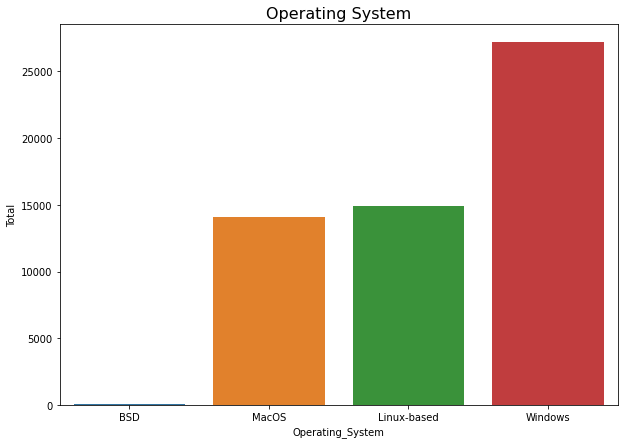

In [107]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=0)
sns.barplot(x='OpSys', y='No_Of_Users',data=srtOpSys)
plt.ylabel('Total')
plt.xlabel('Operating_System')
plt.title('Operating System', fontsize=16)
plt.show()

### Checking for Organisation Size people belong to

In [137]:
OrgSize_df=df.groupby ('OrgSize').agg (No_Of_Users=pd.NamedAgg(column='OrgSize', aggfunc='count')).reset_index()
OrgSizeSort=OrgSize_df.sort_values(by='No_Of_Users', ascending=True)
OrgSizeSort

OrgSize  No_Of_Users
6                           5,000 to 9,999 employees         1809
8  Just me - I am a freelancer, sole proprietor, ...         2190
7                               500 to 999 employees         2880
1                                 10 to 19 employees         4127
4                                   2 to 9 employees         4409
0                           1,000 to 4,999 employees         4863
2                           10,000 or more employees         6149
3                               100 to 499 employees         8311
5                                 20 to 99 employees         9597

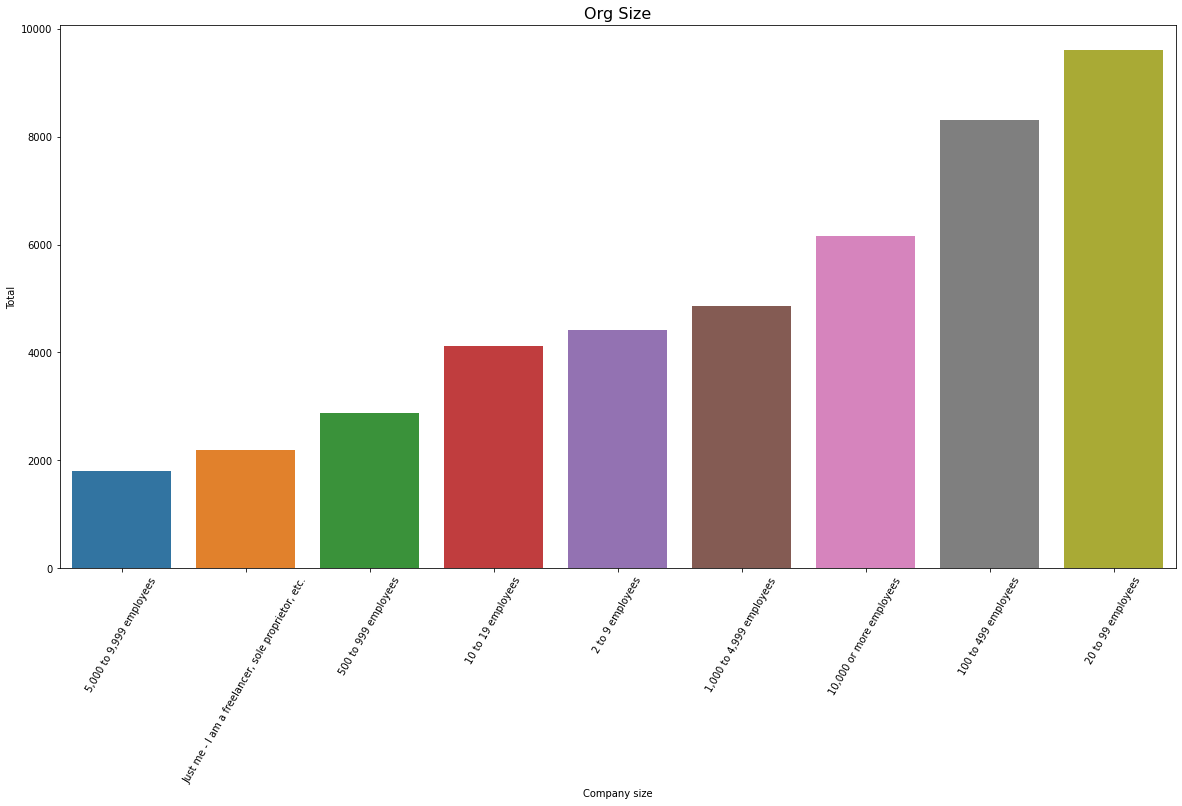

In [139]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=60)
sns.barplot(x='OrgSize', y='No_Of_Users',data=OrgSizeSort)
plt.ylabel('Total')
plt.xlabel('Company size')
plt.title('Org Size', fontsize=16)
plt.show()